# Basketball Playoffs

Basketball tournaments are usually split in two parts. First, all teams play each other aiming to achieve the greatest number of wins possible. Then, at the end of the first part of the season, a pre determined number of teams which were able to win the most games are qualified to the playoff season, where they play series of knock-out matches for the trophy.

For the 10 years, data from players, teams, coaches, games and several other metrics were gathered and arranged on this dataset. The goal is to use this data to predict which teams will qualify for the playoffs in the next season.

In [334]:
# Imports
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

## Data Preprocess

### Exploratory Data Analysis

In [335]:
df_teams = pd.read_csv('dataset/teams.csv')
df_players = pd.read_csv('dataset/players.csv')
df_coaches = pd.read_csv('dataset/coaches.csv')
df_players_teams = pd.read_csv('dataset/players_teams.csv')
df_awards_players = pd.read_csv('dataset/awards_players.csv')
df_series_post = pd.read_csv('dataset/series_post.csv')
df_teams_post = pd.read_csv('dataset/teams_post.csv')

df_collection = [df_teams, df_players, df_coaches, df_players_teams, df_awards_players, df_series_post, df_teams_post]

for dataframe in df_collection:
    dataframe.drop_duplicates(inplace=True)
pd.set_option('display.max_rows', None)
# df_teams.head()

df_teams.isna().sum()

year            0
lgID            0
tmID            0
franchID        0
confID          0
divID         142
rank            0
playoff         0
seeded          0
firstRound     62
semis         104
finals        122
name            0
o_fgm           0
o_fga           0
o_ftm           0
o_fta           0
o_3pm           0
o_3pa           0
o_oreb          0
o_dreb          0
o_reb           0
o_asts          0
o_pf            0
o_stl           0
o_to            0
o_blk           0
o_pts           0
d_fgm           0
d_fga           0
d_ftm           0
d_fta           0
d_3pm           0
d_3pa           0
d_oreb          0
d_dreb          0
d_reb           0
d_asts          0
d_pf            0
d_stl           0
d_to            0
d_blk           0
d_pts           0
tmORB           0
tmDRB           0
tmTRB           0
opptmORB        0
opptmDRB        0
opptmTRB        0
won             0
lost            0
GP              0
homeW           0
homeL           0
awayW           0
awayL     

In [336]:
df_teams.replace("", np.nan, inplace=True)
df_teams.dropna(axis=1, how='all', inplace=True)

if (df_teams['seeded'] == 0).all():
    df_teams.drop('seeded', axis=1, inplace=True)

#df_teams.value_counts('franchID')

cols_to_remove = ['lgID', 'attend']

df_teams.drop(cols_to_remove, axis=1, inplace=True)

df_teams.head()

,year,tmID,franchID,confID,rank,playoff,firstRound,semis,finals,name,...,lost,GP,homeW,homeL,awayW,awayL,confW,confL,min,arena
0,9,ATL,ATL,EA,7,N,NaN,NaN,NaN,Atlanta Dream,...,30,34,1,16,3,14,2,18,6825,Philips Arena
1,10,ATL,ATL,EA,2,Y,L,NaN,NaN,Atlanta Dream,...,16,34,12,5,6,11,10,12,6950,Philips Arena
2,1,CHA,CHA,EA,8,N,NaN,NaN,NaN,Charlotte Sting,...,24,32,5,11,3,13,5,16,6475,Charlotte Coliseum
3,2,CHA,CHA,EA,4,Y,W,W,L,Charlotte Sting,...,14,32,11,5,7,9,15,6,6500,Charlotte Coliseum
4,3,CHA,CHA,EA,2,Y,L,NaN,NaN,Charlotte Sting,...,14,32,11,5,7,9,12,9,6450,Charlotte Coliseum


In [337]:
cols_to_remove = ['college','collegeOther','birthDate','deathDate']

df_players.drop(cols_to_remove, axis=1, inplace=True)

df_players.head()

,bioID,pos,firstseason,lastseason,height,weight
0,abrahta01w,C,0,0,74.0,190
1,abrossv01w,F,0,0,74.0,169
2,adairje01w,C,0,0,76.0,197
3,adamsda01w,F-C,0,0,73.0,239
4,adamsjo01w,C,0,0,75.0,180


In [338]:
if df_coaches['stint'].nunique() == 1:
    df_coaches.drop('stint', axis=1, inplace=True)

df_coaches.drop('lgID', axis=1, inplace=True)

df_coaches.head()

,coachID,year,tmID,stint,won,lost,post_wins,post_losses
0,adamsmi01w,5,WAS,0,17,17,1,2
1,adubari99w,1,NYL,0,20,12,4,3
2,adubari99w,2,NYL,0,21,11,3,3
3,adubari99w,3,NYL,0,18,14,4,4
4,adubari99w,4,NYL,0,16,18,0,0


In [339]:
# df_players['height'].value_counts()

df_players.head(10)
df_players.replace({'pos': ""}, np.nan, inplace=True)

remov_conditions = df_players[(df_players['height'] <= 0.0) | (df_players['weight'] <= 0) | (df_players['pos'].isna())].index
df_players.drop(remov_conditions , inplace=True)
df_players.head(10)

,bioID,pos,firstseason,lastseason,height,weight
0,abrahta01w,C,0,0,74.0,190
1,abrossv01w,F,0,0,74.0,169
2,adairje01w,C,0,0,76.0,197
3,adamsda01w,F-C,0,0,73.0,239
4,adamsjo01w,C,0,0,75.0,180
8,aguilel01w,G,0,0,67.0,165
9,ajavoma01w,G,0,0,68.0,160
11,aldrima01w,G,0,0,71.0,153
12,alexaer01w,G,0,0,67.0,140
13,alhalta01w,F-G,0,0,72.0,149


In [340]:
def data_results(testing_classes, testing_inputs, alg_class):
    cm_display = ConfusionMatrixDisplay(
        confusion_matrix=confusion_matrix(testing_classes, alg_class.predict(testing_inputs))
    )

    cm_display.plot()
    plt.xticks([0, 1], ["No", "Yes"])
    plt.yticks([0, 1], ["No", "Yes"])
    plt.xlabel('Predicted Entry')
    plt.ylabel('Actual Entry')
    plt.show()

    print(classification_report(testing_classes, alg_class.predict(testing_inputs)))

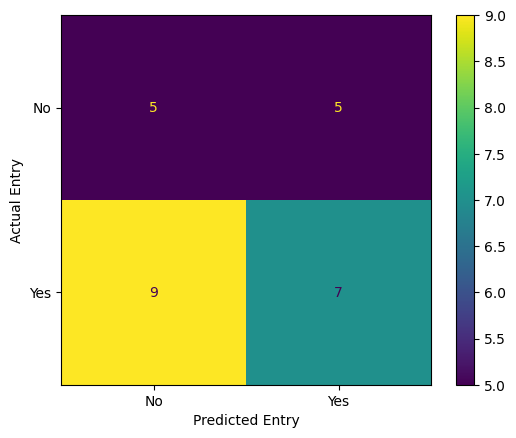

              precision    recall  f1-score   support

           N       0.36      0.50      0.42        10
           Y       0.58      0.44      0.50        16

    accuracy                           0.46        26
   macro avg       0.47      0.47      0.46        26
weighted avg       0.50      0.46      0.47        26



[Text(0.6470588235294118, 0.9666666666666667, 'awayW <= 9.5\ngini = 0.494\nsamples = 72\nvalue = [32, 40]'),
 Text(0.49411764705882355, 0.9, 'homeW <= 13.5\ngini = 0.5\nsamples = 62\nvalue = [31, 31]'),
 Text(0.4470588235294118, 0.8333333333333334, 'homeW <= 12.5\ngini = 0.499\nsamples = 60\nvalue = [29.0, 31.0]'),
 Text(0.2823529411764706, 0.7666666666666667, 'homeW <= 6.5\ngini = 0.499\nsamples = 54\nvalue = [28, 26]'),
 Text(0.18823529411764706, 0.7, 'homeW <= 5.5\ngini = 0.444\nsamples = 12\nvalue = [8, 4]'),
 Text(0.1411764705882353, 0.6333333333333333, 'awayW <= 4.5\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.09411764705882353, 0.5666666666666667, 'homeW <= 4.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.047058823529411764, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1411764705882353, 0.5, 'awayW <= 3.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.09411764705882353, 0.43333333333333335, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.18

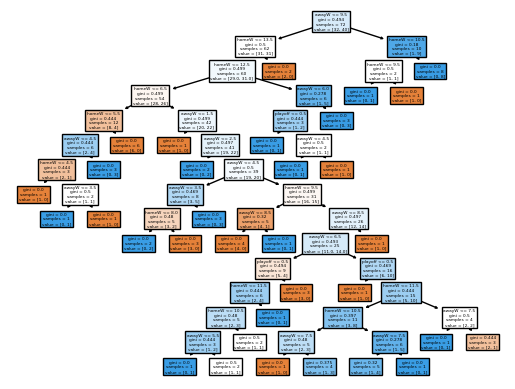

In [341]:
from sklearn.tree import plot_tree


df_teams = df_teams.sort_values(by=['franchID', 'year'])
df_teams['playoffNextYear'] = df_teams['playoff'].shift(-1)
df_teams.loc[df_teams['franchID'] != df_teams['franchID'].shift(-1), 'playoffNextYear'] = None
df_teams.dropna(subset=['playoffNextYear'], inplace=True)

label_encoder = LabelEncoder()
df_teams['playoff'] = label_encoder.fit_transform(df_teams['playoff'])

features = ['homeW', 'awayW', 'playoff'] # attend?

df_teams_train = df_teams[df_teams['year'] <= 5]
df_teams_test = df_teams[df_teams['year'].isin([6,7])]

training_inputs = df_teams_train[features]
training_classes = df_teams_train['playoffNextYear']
testing_inputs = df_teams_test[features]
testing_classes = df_teams_test['playoffNextYear']

dt_class = DecisionTreeClassifier(random_state=42)
dt_class.fit(training_inputs, training_classes)
# dt_class.predict(testing_inputs)

dt_class.score(testing_inputs, testing_classes)

accuracy_score(testing_classes, dt_class.predict(testing_inputs))

data_results(testing_classes, testing_inputs, dt_class)

plot_tree(dt_class, feature_names=features, filled=True)

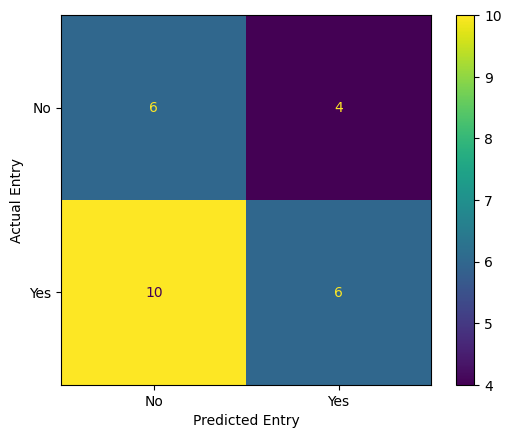

              precision    recall  f1-score   support

           N       0.38      0.60      0.46        10
           Y       0.60      0.38      0.46        16

    accuracy                           0.46        26
   macro avg       0.49      0.49      0.46        26
weighted avg       0.51      0.46      0.46        26



In [342]:
rf_class = RandomForestClassifier(n_estimators=100)
rf_class.fit(training_inputs, training_classes)

rf_class.score(testing_inputs, testing_classes)

accuracy_score(testing_classes, rf_class.predict(testing_inputs))

data_results(testing_classes, testing_inputs, rf_class)

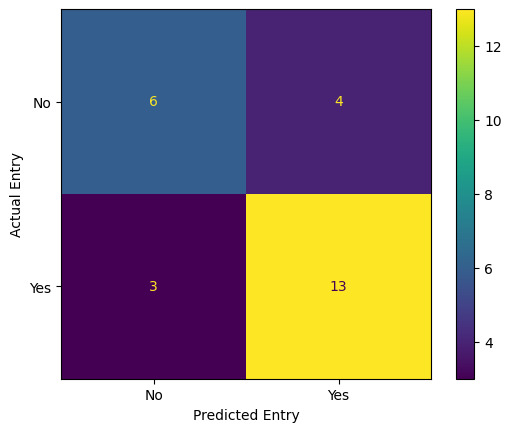

              precision    recall  f1-score   support

           N       0.67      0.60      0.63        10
           Y       0.76      0.81      0.79        16

    accuracy                           0.73        26
   macro avg       0.72      0.71      0.71        26
weighted avg       0.73      0.73      0.73        26



In [343]:
nb_class = GaussianNB()
nb_class.fit(training_inputs, training_classes)

nb_class.score(testing_inputs, testing_classes)

accuracy_score(testing_classes, nb_class.predict(testing_inputs))

data_results(testing_classes, testing_inputs, nb_class)

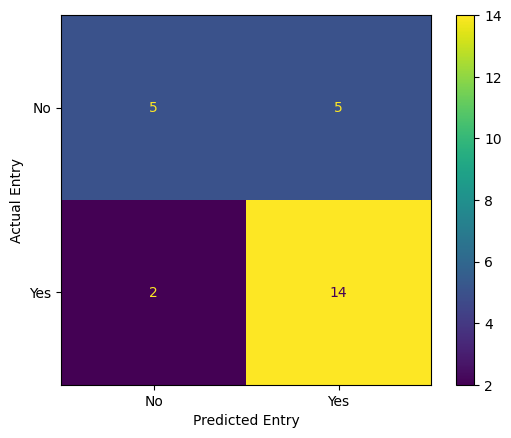

              precision    recall  f1-score   support

           N       0.71      0.50      0.59        10
           Y       0.74      0.88      0.80        16

    accuracy                           0.73        26
   macro avg       0.73      0.69      0.69        26
weighted avg       0.73      0.73      0.72        26



In [344]:
svm_class = SVC(kernel='rbf')
svm_class.fit(training_inputs, training_classes)

svm_class.score(testing_inputs, testing_classes)

accuracy_score(testing_classes, svm_class.predict(testing_inputs))

data_results(testing_classes, testing_inputs, svm_class)

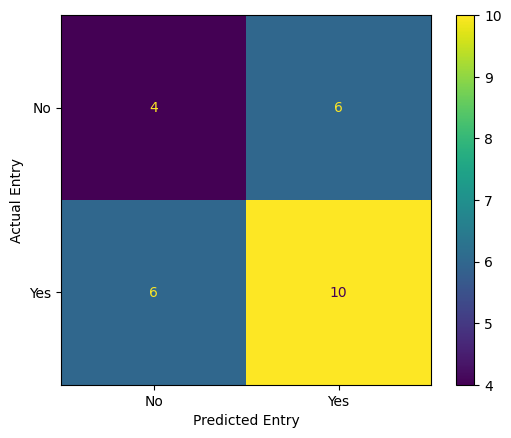

              precision    recall  f1-score   support

           N       0.40      0.40      0.40        10
           Y       0.62      0.62      0.62        16

    accuracy                           0.54        26
   macro avg       0.51      0.51      0.51        26
weighted avg       0.54      0.54      0.54        26



In [345]:
knn_class = KNeighborsClassifier(n_neighbors=5)
knn_class.fit(training_inputs, training_classes)

knn_class.score(testing_inputs, testing_classes)

accuracy_score(testing_classes, knn_class.predict(testing_inputs))

data_results(testing_classes, testing_inputs, knn_class)

c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


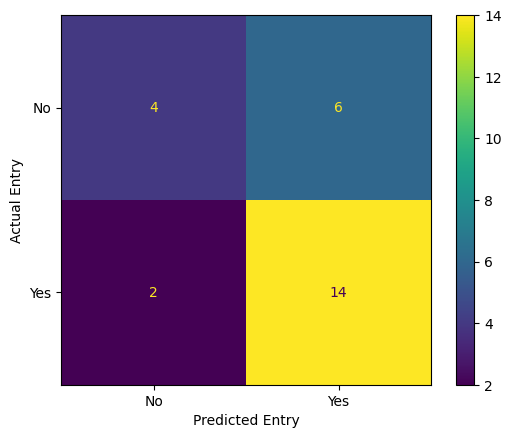

              precision    recall  f1-score   support

           N       0.67      0.40      0.50        10
           Y       0.70      0.88      0.78        16

    accuracy                           0.69        26
   macro avg       0.68      0.64      0.64        26
weighted avg       0.69      0.69      0.67        26



In [346]:
ann_class = MLPClassifier(random_state=42, max_iter=300)
ann_class.fit(training_inputs, training_classes)

ann_class.score(testing_inputs, testing_classes)

accuracy_score(testing_classes, ann_class.predict(testing_inputs))

data_results(testing_classes, testing_inputs, ann_class)